In [41]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Linear Regression With One Column

In [37]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['target'] = boston.target

In [39]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
X, y = data["DIS"], data["target"]

Text(0.5, 1.0, 'Linear regression with DIS column')

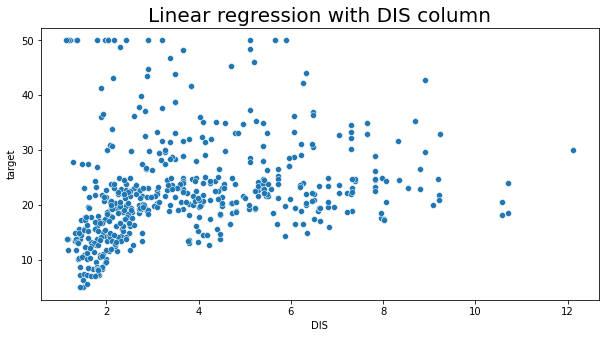

In [52]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=X,y=y)
plt.title('Linear regression with DIS column', fontsize = 20)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(list(X), list(y), test_size = 0.3, random_state = 31)

In [123]:
import numpy as np

In [139]:
def f_wb(x, w, b):
    return w * x + b

def cost_function(x, y, w, b):
    m = len(x)
    mean_of_sum = (1/(2 * m))
    sum_of_squared_error = 0

    for i in range(m):
        sum_of_squared_error += (f_wb(x[i], w, b) - y[i])**2

    return mean_of_sum * sum_of_squared_error

def derivative_cost_function(x, y, w, b):
    m = len(x)

    mean_of_sum = 1/m
    d_cost_w = 0
    d_cost_b = 0

    for i in range(m):
        f_wb_i = f_wb(x[i], w, b)

        d_cost_w += (f_wb_i - y[i]) * x[i]
        d_cost_b += (f_wb_i - y[i])
    
    d_cost_w = mean_of_sum * d_cost_w
    d_cost_b = mean_of_sum * d_cost_b


    return d_cost_w, d_cost_b


def gradient_descent(x, y, learning_rate, batch=10):
    w = 0
    b = 0

    for i in range(batch):

        d_cost_w, d_cost_b = derivative_cost_function(x, y, w, b)
        
        temp_w = w - learning_rate * d_cost_w
        temp_b = b - learning_rate * d_cost_b

        w = temp_w
        b = temp_b

        print(f"Iteration {i}: Cost: {cost_function(x, y, w, b)}, d_jw: {d_cost_w}, d_jb: {d_cost_b}, w: {w}, b: {b}")
    
    return w, b

In [140]:
learning_rate = 0.01
batch = 50
w, b = gradient_descent(X_train, y_train, learning_rate, batch)

Iteration 0: Cost: 226.30620587195708, d_jw: -91.17842237288139, d_jb: -22.962146892655372, w: 0.9117842237288138, b: 0.22962146892655372
Iteration 1: Cost: 174.92895454535142, d_jw: -72.99086371997782, d_jb: -19.26727273964672, w: 1.6416928609285921, b: 0.4222941963230209
Iteration 2: Cost: 141.78224865098557, d_jw: -58.39756590248972, d_jb: -16.30056883429527, w: 2.2256685199534894, b: 0.5852998846659736
Iteration 3: Cost: 120.37350273894356, d_jw: -46.68830077384963, d_jb: -13.91815293111129, w: 2.6925515276919856, b: 0.7244814139770865
Iteration 4: Cost: 106.52249554019694, d_jw: -37.29318152862787, d_jb: -12.004573958179444, w: 3.0654833429782644, b: 0.844527153558881
Iteration 5: Cost: 97.5378103213729, d_jw: -29.754931202676744, d_jb: -10.467194006984064, w: 3.363032655005032, b: 0.9491990936287216
Iteration 6: Cost: 91.68658997783427, d_jw: -23.706630927692807, d_jb: -9.231680443080428, w: 3.60009896428196, b: 1.0415158980595258
Iteration 7: Cost: 87.85314140684073, d_jw: -18.8

In [154]:
y_hat = np.dot(w,X_test) + b

Text(0.5, 1.0, 'Linear regression with DIS column')

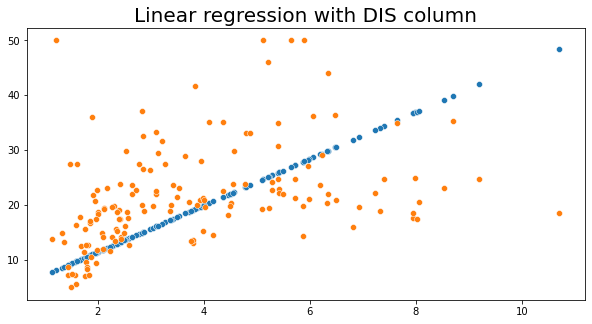

In [155]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=X_test,y=y_hat)
sns.scatterplot(x=X_test,y=y_test)
plt.title('Linear regression with DIS column', fontsize = 20)